## Classifying Movie Reviews
* Binary Clssification On IMDB Dataset
* Input: 50,000 Reviews
* Ouput: Positive and Negative

In [0]:
from keras.datasets import imdb

## Data Preparation

In [0]:
((XT,YT),(Xt,Yt))= imdb.load_data(num_words=10000)

In [81]:
len(XT)

25000

In [82]:
len(Xt)

25000

In [83]:
XT[0]  #Keras convert text into numbers (using vocab)-> first review sentence

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [0]:
word_idx=imdb.get_word_index()          #word_idx is a dictionary

In [85]:
print(word_idx.items())

dict_items([('fawn', 34701), ('tsukino', 52006), ('nunnery', 52007), ('sonja', 16816), ('vani', 63951), ('woods', 1408), ('spiders', 16115), ('hanging', 2345), ('woody', 2289), ('trawling', 52008), ("hold's", 52009), ('comically', 11307), ('localized', 40830), ('disobeying', 30568), ("'royale", 52010), ("harpo's", 40831), ('canet', 52011), ('aileen', 19313), ('acurately', 52012), ("diplomat's", 52013), ('rickman', 25242), ('arranged', 6746), ('rumbustious', 52014), ('familiarness', 52015), ("spider'", 52016), ('hahahah', 68804), ("wood'", 52017), ('transvestism', 40833), ("hangin'", 34702), ('bringing', 2338), ('seamier', 40834), ('wooded', 34703), ('bravora', 52018), ('grueling', 16817), ('wooden', 1636), ('wednesday', 16818), ("'prix", 52019), ('altagracia', 34704), ('circuitry', 52020), ('crotch', 11585), ('busybody', 57766), ("tart'n'tangy", 52021), ('burgade', 14129), ('thrace', 52023), ("tom's", 11038), ('snuggles', 52025), ('francesco', 29114), ('complainers', 52027), ('templari

In [0]:
#Creating a reverse dictionary to find out the original review sentences

idx_word= dict([value,key] for(key,value) in word_idx.items())

In [126]:
print(idx_word.items())

dict_items([(34701, 'fawn'), (52006, 'tsukino'), (52007, 'nunnery'), (16816, 'sonja'), (63951, 'vani'), (1408, 'woods'), (16115, 'spiders'), (2345, 'hanging'), (2289, 'woody'), (52008, 'trawling'), (52009, "hold's"), (11307, 'comically'), (40830, 'localized'), (30568, 'disobeying'), (52010, "'royale"), (40831, "harpo's"), (52011, 'canet'), (19313, 'aileen'), (52012, 'acurately'), (52013, "diplomat's"), (25242, 'rickman'), (6746, 'arranged'), (52014, 'rumbustious'), (52015, 'familiarness'), (52016, "spider'"), (68804, 'hahahah'), (52017, "wood'"), (40833, 'transvestism'), (34702, "hangin'"), (2338, 'bringing'), (40834, 'seamier'), (34703, 'wooded'), (52018, 'bravora'), (16817, 'grueling'), (1636, 'wooden'), (16818, 'wednesday'), (52019, "'prix"), (34704, 'altagracia'), (52020, 'circuitry'), (11585, 'crotch'), (57766, 'busybody'), (52021, "tart'n'tangy"), (14129, 'burgade'), (52023, 'thrace'), (11038, "tom's"), (52025, 'snuggles'), (29114, 'francesco'), (52027, 'complainers'), (52125, 't

In [0]:
actual_review=' '.join([idx_word.get(idx-3,'#') for idx in XT[0]])   #we have <pad><s><unknown>  So, index changes by 3

In [128]:
print(actual_review)

# this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert # is an amazing actor and now the same being director # father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for # and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also # to the two little boy's that played the # of norman and paul they were just brilliant children are often left out of the # list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

## Next Step-> Vectorize the Data
* Vocab Size=10,000
* Represent every word using a vector of len 10,000
* Vector contains 0s and 1s
* It represents the absence and presence of words
* Input Layer of NN requires same no of input features for every example

In [0]:
import numpy as np
def vectorize_sentences(sentences,dim=10000):
  outputs=np.zeros((len(sentences),dim))

  for i,idx in enumerate(sentences):
    outputs[i,idx]=1
  return outputs

In [0]:
X_train=vectorize_sentences(XT)
X_test=vectorize_sentences( Xt)

In [131]:
print(X_train.shape)
print(X_test.shape)


(25000, 10000)
(25000, 10000)


In [132]:
print(X_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [0]:
Y_train=np.array(YT,dtype='float32')
Y_test=np.array(Yt,dtype='float32')


In [134]:
print(Y_train)

[1. 0. 0. ... 0. 1. 0.]


## Build a Neural Network

## **Define Model Architecture**
* Use Fully Connected/Dense Layers with RELU activation
* 2 Hidden Layers with 16 units/neurons each
* 1 Output Layer with 1 unit(Sigmoid Activation)


**Output can be -> 0=negative review OR 1=positive review**

In [0]:
from keras import models
from keras.layers import Dense

In [0]:
#Define the Model
model=models.Sequential()
model.add(Dense(16,activation='relu',input_shape=(10000,)))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [0]:
#Compile the model
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

#optimizer-> used to adjust the weights using back propagation (eg. adam)

In [138]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_14 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


## **Training and Validation**

In [0]:
# Parameters are more than the no. of training examples
# Model may overfit


In [0]:
x_val=X_train[:5000]
x_train_new=X_train[5000:]

y_val=Y_train[:5000]
y_train_new=Y_train[5000:]


In [141]:
hist=model.fit(x_train_new,y_train_new,epochs=4,batch_size=512,validation_data=(x_val,y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/4
20000/20000 [==============================] - 2s 113us/step - loss: 0.4627 - accuracy: 0.8089 - val_loss: 0.3326 - val_accuracy: 0.8794
Epoch 2/4
20000/20000 [==============================] - 2s 105us/step - loss: 0.2658 - accuracy: 0.9071 - val_loss: 0.3009 - val_accuracy: 0.8778
Epoch 3/4
20000/20000 [==============================] - 2s 106us/step - loss: 0.2011 - accuracy: 0.9302 - val_loss: 0.2782 - val_accuracy: 0.8876
Epoch 4/4
20000/20000 [==============================] - 2s 107us/step - loss: 0.1650 - accuracy: 0.9426 - val_loss: 0.2714 - val_accuracy: 0.8936


# **Visualize our Results**

In [0]:
import matplotlib.pyplot as plt

In [0]:
#hist?

In [0]:
h=hist.history

In [0]:
#h

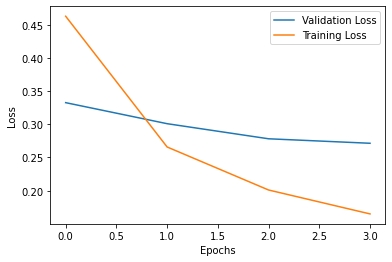

In [146]:
plt.plot(h['val_loss'],label="Validation Loss")
plt.plot(h['loss'],label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [0]:
# Graph shows overfitting

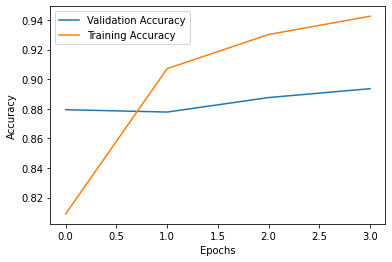

In [148]:
plt.plot(h['val_accuracy'],label="Validation Accuracy")
plt.plot(h['accuracy'],label="Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [0]:
# Early stopping at 3.5 epochs(instead of 2.5 bcz indexing is from 0)

In [151]:
model.evaluate(X_train,Y_train)[1]      #Accuracy using 4 epochs

25000/25000 [==============================] - 2s 69us/step


0.9482399821281433

In [152]:
model.evaluate(X_test,Y_test)[1]      #Accuracy using 4 epochs

25000/25000 [==============================] - 2s 65us/step


0.8810799717903137

In [0]:
pred=model.predict(X_test)

In [154]:
model.predict(X_test).shape

(25000, 1)

In [161]:
pred=np.array(pred)
print(pred)

[[0.22599494]
 [0.999791  ]
 [0.7586054 ]
 ...
 [0.12184325]
 [0.11882892]
 [0.49570695]]


In [0]:
output=[]

for i in range(pred.shape[0]):
  if(i>=0.5):
    p="Positive"
  else:
    p="Negative"
  output.append(p)


In [164]:
print(output)

['Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Po

In [0]:
output=np.array(output)

In [166]:
output.shape

(25000,)